In [7]:
# Setup
import sys
path = "/Users/simonwittum/Documents/Uni/Master/Semester2/SemesterProject/Code/na64-multivariate-analysis/Simon_Code/"
sys.path.append(path)

# Essentials
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Custom
from analysis_simulation import SimulationAnalyzer
from classifiers import *

file_pPs = "../data/txt_files/TwoGamma_10M.txt"
file_oPs = "../data/txt_files/ThreeGamma_10M.txt"

In [8]:
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 16

## Part 1: Plotting 2D Histogram

In [9]:
An = SimulationAnalyzer(file_pPs, file_oPs)
An.full_process(smearing=0, crystal_window=[0.01, 1_000], module_window=[0.01, 1_000], coincidence=False, integration_mode="module")

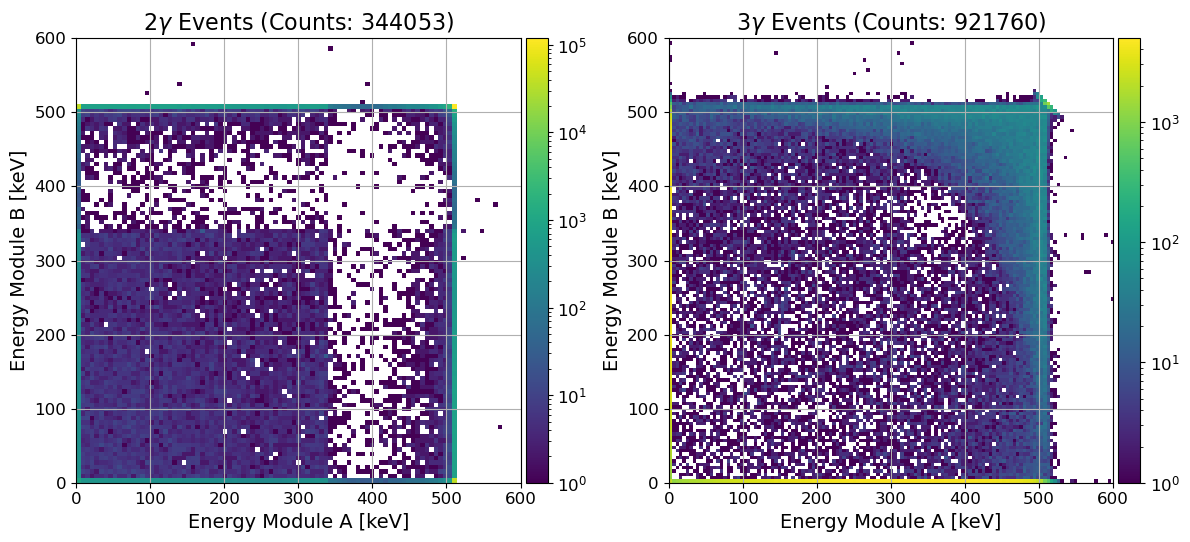

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Heatplot 1
h1 = ax[0].hist2d(An.energy_pPs_p[:, 0], An.energy_pPs_p[:, 1], bins=(150, 150), norm=LogNorm())
ax[0].set_title(rf'$2\gamma$ Events (Counts: {An.n_pPs})')
ax[0].set_xlabel('Energy Module A [keV]')
ax[0].set_ylabel('Energy Module B [keV]')
ax[0].grid()
ax[0].set_xlim(0, 600)
ax[0].set_ylim(0, 600)
# plt.colorbar(h1[3], ax=ax[0])
ax[0].set_aspect('equal', adjustable='box')
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h1[3], cax=cax1)

# Heatplot 2
h2 = ax[1].hist2d(An.energy_oPs_p[:, 0], An.energy_oPs_p[:, 1], bins=(150, 150), norm=LogNorm())
ax[1].set_title(rf'$3\gamma$ Events (Counts: {An.n_oPs})')
ax[1].set_xlabel('Energy Module A [keV]')
ax[1].set_ylabel('Energy Module B [keV]')
ax[1].grid()
ax[1].set_xlim(0, 600)
ax[1].set_ylim(0, 600)
# plt.colorbar(h2[3], ax=ax[1])
ax[1].set_aspect('equal', adjustable='box')
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h2[3], cax=cax2)

plt.tight_layout()
plt.show()